git:https://github.com/Yuhan-Chen831/DCSI-510_Final_Project

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms # BP test
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.stats.outliers_influence as smo
import patsy as pt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

In [2]:
# read csv 
diamonds = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/diamonds.csv')
# display the dataset
print(diamonds.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [3]:
#Create a dataframe
df = pd.DataFrame(diamonds)
print("The DataFrame object")
print(df)

The DataFrame object
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe().round()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0
mean,26970.0,1.0,62.0,57.0,3933.0,6.0,6.0,4.0
std,15571.0,0.0,1.0,2.0,3989.0,1.0,1.0,1.0
min,1.0,0.0,43.0,43.0,326.0,0.0,0.0,0.0
25%,13486.0,0.0,61.0,56.0,950.0,5.0,5.0,3.0
50%,26970.0,1.0,62.0,57.0,2401.0,6.0,6.0,4.0
75%,40455.0,1.0,62.0,59.0,5324.0,7.0,7.0,4.0
max,53940.0,5.0,79.0,95.0,18823.0,11.0,59.0,32.0


In [6]:
# correlation matrix
cormat = diamonds[[]]
cormat.corr().round(decimals=3)

""


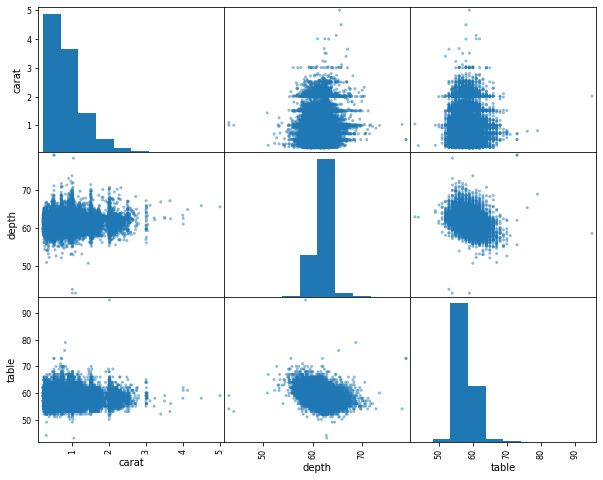

In [7]:
# correlation graphs
pd.plotting.scatter_matrix(diamonds[['carat','cut', 'color', 'clarity', 'depth', 'table']], alpha=0.5, figsize=(10, 8));

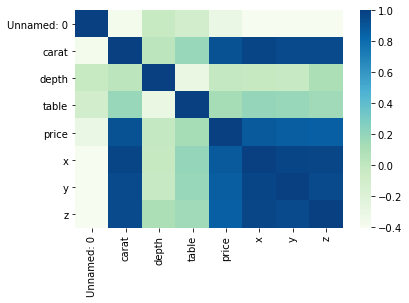

In [8]:
# heatmap
correlations = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations,cmap='GnBu')
plt.show()


Quantitative analysis

(325.0, 20000.0)

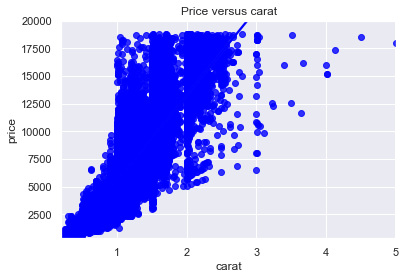

In [9]:
# individual quantitative variable analysis
sns.set_theme(color_codes=True)
plot1 = sns.regplot(x="carat", y="price", data=df, color='blue')
plot1.set_title('Price versus carat')
plot1.set_ylim(325,20000)

From the graph above, I found that there is a direct relationship between carat and price, and the slope of the linear regression model is big, which means an increase in carat will lead to a large increase in price.



(50.0, 75.0)

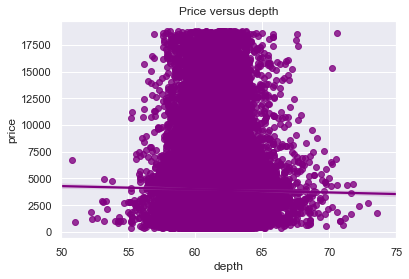

In [10]:
plot2 = sns.regplot(x="depth", y="price", data=df, color = 'purple')
plot2.set_title('Price versus depth')
plot2.set_xlim(50,75)


From the graph above, I found that the change in depth does not result in significant changes in the price of diamonds.

(40.0, 80.0)

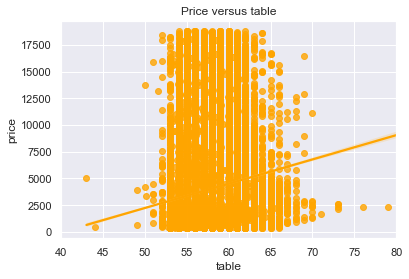

In [11]:
plot3 = sns.regplot(x="table", y="price", data=diamonds, color='orange')
plot3.set_title('Price versus table')
plot3.set_xlim(40,80)

From the graph above, I found that there is a direct relationship between table and price, but the slope of the linear regression model is relatively small compared to carat, which means the influence on the price of table is smaller than the influence of carat.

In [12]:
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_len = []
for i in cut:
    aux = diamonds.apply(lambda x: True if x['cut'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_len.append(aux_len)
cut_len
# individual qualitative variable analysis
# number of different kinds of cuts

[1610, 4906, 12082, 13791, 21551]

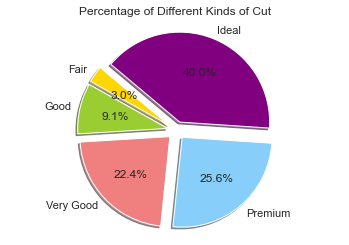

In [13]:
# pie chart for cut
labels = 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal'
sizes = [1610, 4906, 12082, 13791,21551]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Different Kinds of Cut')

plt.axis('equal')
plt.show()

From the pie chart, I found that the percentage of ideally-cut diamonds is the biggest while the percentage of fairly-cut diamonds is the smallest.

In [14]:
# number of different kinds of colors
color = ('D', 'E', 'F', 'G', 'H', 'I', 'J')
color_len = []
for i in color:
    aux = diamonds.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    color_len.append(aux_len)
color_len

[6775, 9797, 9542, 11292, 8304, 5422, 2808]

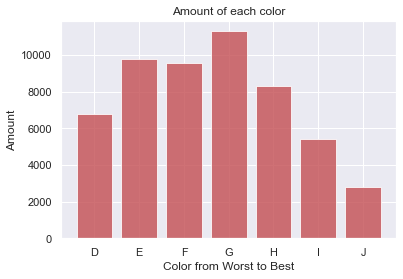

In [15]:
# bar chart for color
plt.bar(color, color_len, align='center',color='r', alpha=0.8)
plt.title('Amount of each color')
plt.xlabel('Color from Worst to Best')
plt.ylabel('Amount')
plt.show()


From the graph above, this is a quantitative distribution of different kinds of colors, and the graph is right-skewed. I can also found that the amount of color "G" is the largest and the amount of color "J" is the smallest.

In [16]:
# create a sub-dataset for each cut
cut_ide = diamonds.loc[diamonds['cut'] == 'Ideal'] ## select a sub-dataset where cut is Ideal
cut_pre = diamonds.loc[diamonds['cut'] == 'Premium'] ## select a sub-dataset where cut is Premium
cut_vgood = diamonds.loc[diamonds['cut'] == 'Very Good'] ## select a sub-dataset where cut is very Good
cut_good = diamonds.loc[diamonds['cut'] == 'Good'] ## select a sub-dataset where cut is Good
cut_fair = diamonds.loc[diamonds['cut'] == 'Fair'] ## select a sub-dataset where cut is Fair

In [17]:
# number of different kinds of color for each cut
cut_ide_color = []
cut_pre_color = []
cut_vgood_color = []
cut_good_color = []
cut_fair_color = []
for i in color:
    aux = cut_ide.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_ide_color.append(aux_len)
for i in color:
    aux = cut_pre.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_pre_color.append(aux_len)
for i in color:
    aux = cut_vgood.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_vgood_color.append(aux_len)
for i in color:
    aux = cut_good.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_good_color.append(aux_len)
for i in color:
    aux = cut_fair.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_fair_color.append(aux_len)
cut_color  = [cut_ide_color, cut_pre_color, cut_vgood_color, cut_good_color, cut_fair_color]
cut_color


[[2834, 3903, 3826, 4884, 3115, 2093, 896],
 [1603, 2337, 2331, 2924, 2360, 1428, 808],
 [1513, 2400, 2164, 2299, 1824, 1204, 678],
 [662, 933, 909, 871, 702, 522, 307],
 [163, 224, 312, 314, 303, 175, 119]]

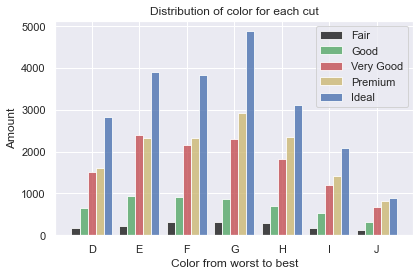

In [18]:
# distribution of color for each cut
n_groups = 7
fig, ax = plt.subplots()
bar_width = 0.17
opacity = 0.8
index = np.arange(n_groups)

plt.bar(index, cut_fair_color, bar_width,alpha=opacity,color='k',label='Fair')
plt.bar(index+ bar_width, cut_good_color, bar_width,alpha=opacity,color='g',label='Good')
plt.bar(index+ 2*bar_width, cut_vgood_color, bar_width,alpha=opacity,color='r',label='Very Good')
plt.bar(index+ 3*bar_width, cut_pre_color, bar_width,alpha=opacity,color='y',label='Premium')
plt.bar(index+ 4*bar_width, cut_ide_color, bar_width,alpha=opacity,color='b',label='Ideal')

plt.xlabel('Color from worst to best')
plt.ylabel('Amount')
plt.title('Distribution of color for each cut')
plt.xticks(index + 2*bar_width, color)
plt.legend()

plt.tight_layout()
plt.show()


From the graph above, I found that the quantitative distribution of color in each kind of cut is approximately normal distribution.

# Model 1

In [19]:
# estimate the linear regression model:
model1 = smf.ols(formula='price ~ cut + carat + color + clarity + depth + table', data=diamonds)
model1 = model1.fit()

# print results using summary:cut
print(f'results.summary(): \n{model1.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:11:11   Log-Likelihood:            -4.5696e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53919   BIC:                         9.141e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -45

From the OLS regression results of Model 1, I found that:

(1) R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.916 would mean Model 1 explains 91.6% of the change in our ‘price’ variable.

(2) Adjusted R-squared does not change in Model 1 since there is no other variable adding to the explanatory power to the regression.

(3) The intercept of Model 1 is -4555, which means it is a constant "u" added to explain a starting value for our line when all variables were tuned to 0.

(4) The coefficient means one unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. For example, the coefficient of depth is -21, which means one unit of change in depth will cause an inverse coefficient's worth of change in diamonds' price. Besides, I found that cut, clarity, and carat have a positive coefficient which indicates a direct relationship with price. Whereas, color, depth, and table have a negative coefficient which indicates an inverse relationship with price.

(5) P>|t| uses the t statistic to produce the p value, a measurement of how likely the coefficient is measured through our model by chance. In Model 1, for example, the p value of 0 means that with a 95% probability of being correct that I reject the null hypothesis (there is no relationship between the independent variables and the dependent variable price). I can conclude that cut, color, clarity, carat, depth, table have a significant relationship with the price of diamonds.

(6) [0.025 and 0.975] are both measurements of values of coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

(7) Prob(F-Statistic) is 0, which depicts that the probability of the null hypothesis being true is zero. This implies that the overall regression is meaningful and I should reject the null hypothesis (there is no relationship between the independent variables and the dependent variable price).

# Model 2

In [21]:
cut_dummy = pd.get_dummies(diamonds['cut'])
cut_dummy2 = cut_dummy.rename(columns = {"Very Good": "VeryGood"})
diamonds2 = pd.concat([diamonds,cut_dummy2], axis =1)
diamonds2

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,VeryGood
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,0,0
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,0,1
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0


In [22]:
# estimate the linear regression model:
model2 = smf.ols(formula='price ~ Fair+ Good + VeryGood + Premium +Ideal+ carat + color + clarity + depth + table', data=diamonds2)
model2 = model2.fit()

# print results using summary:
print(f'results.summary(): \n{model2.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:14:04   Log-Likelihood:            -4.5696e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53919   BIC:                         9.141e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3283.

Model 2 is a key innovation by breaking cut down into a series of dummy variables with cut quality ranked from low to high: Fair, Good, VeryGood, Premium, Ideal. I found that coefficients of these five dummy variables are negative which indicates an inverse relationship with price. Besides, the result shows that the coefficient increases as the level of cut increases. For example, a diamond with a fair cut has a coefficient of -1271.9362 and a diamond with an ideal cut has a coefficient of -394.3670. This implies that the better the cut is, the smaller effect on the inverse relationship it has to the price.

# Model 3

In [23]:
# further break down the color variable into dummy variables based on model 2
color_dummy = pd.get_dummies(diamonds['color'])
diamonds3 = pd.concat([diamonds, color_dummy], axis = 1)
diamonds3

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


In [24]:
# estimate the linear regression model:
model3 = smf.ols(formula='price ~ cut_dummy + carat + D + E +F + G + H + I + J + clarity + depth + table', data=diamonds3 )
model3 = model3.fit()

# print results using summary:
print(f'results.summary(): \n{model3.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:15:18   Log-Likelihood:            -4.5696e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53919   BIC:                         9.141e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3546.

Model 3 further breaks down color into 7 dummy variables from D(the best) to J(the worst) based on model 2. In model 1, I found an inverse relationship between color and price. However, in model 3, I found that different color dummy variables have different influences on diamonds' price. The result depicts that color from the best (D) to the worst (J) has a decreasing coefficient. D-rank color has a coefficient of 316. 2997 while J-rank color has a coefficient of -2006.2652. D-rank color to F-rank color have positive coefficients, indicating having a D-rank color to F-rank color is helpful with increasing the price of a diamond. On the other hand, the G-rank color to J-rank color has negative coefficients, implying that having a G-rank color to J-rank color has a negative effect on the price of the diamond and that the worse the color, the more influences the inverse relationship have on the price.

# OLS Regression Results

In [25]:
# use stargazer to view the OLS outputs 
st=Stargazer([model1, model2, model3])
st.covariate_order(['carat', 'depth','table'])
from IPython.core.display import HTML
HTML(st.render_html()) 

# Calculate VIF

In [26]:
# Calculate VIF :
# VIF dataframe
X = diamonds[['price', 'carat','depth','table']].copy()
X['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature          VIF
0      price     6.834162
1      carat     7.000691
2      depth     1.124433
3      table     1.164433
4  Intercept  3611.931933


VIF shows the multicollinearity between the independent variables. Carat, with a VIF of 7, is highly correlated with other independent variables such as depth and table. Meanwhile, depth and table have the VIF of 1.12 and 1.16 respectively, showing that they are somehow correlated with other independent variables but not as significant as carat is.

# Inference Test

## Test 1

In order to test which factor (among the 6 factors  have) will have the biggest influence on the price of diamonds in linear regression model 1 and model 2, I'm going to conduct an ANOVA test to compare the sequential sum of squares of each independent variable.

My hypothesis is that the degree of influences of 6 factors on the price will be arranged as carat > clarity > cut > color > depth > table

In [27]:
model1_order = smf.ols(formula='price ~ carat + clarity + cut + color + depth + table', data=diamonds).fit()
anova_results = anova_lm(model1_order)
display(anova_results)

,df,sum_sq,mean_sq,F,PR(>F)
clarity,7.0,2.330780e+10,3.329686e+09,2491.265865,0.000000e+00
cut,4.0,6.643754e+09,1.660938e+09,1242.711508,0.000000e+00
color,6.0,2.659499e+10,4.432499e+09,3316.388757,0.000000e+00
carat,1.0,7.297638e+11,7.297638e+11,546008.120990,0.000000e+00
depth,1.0,4.940529e+06,4.940529e+06,3.696496,5.453212e-02
table,1.0,9.272659e+07,9.272659e+07,69.377888,8.318118e-17
Residual,53919.0,7.206511e+10,1.336544e+06,NaN,NaN


I found that the sequential sum of squares for carat is the largest, and that represents the variability in the price that is explained by the linear relationship between price and carat. In addition, the sequential sum of squares for depth and table is relatively small compared to other factors, indicating that these two variables are probably not useful for estimating the price of diamonds. Thus, I can conclude that carat plays the most important role in assessing the price of diamonds, and then color, clarity, and cut.

## Test 2

Comparing my hypothesis for Test 1 and the ANOVA result of Test 1, I made a wrong guess of cut's influence on the price of diamonds. I also broke down the cut variable into several dummy variables. Therefore, I decide to do an ANOVA test with cut's dummy variables based on Test 1. According to the result of Test 1, I don't consider variables depth and table anymore.

In [28]:
model2_order = smf.ols(formula='price ~ Fair+ Good+ VeryGood + Premium + Ideal+ carat + color + clarity', data=diamonds2).fit()
anova_results2 = anova_lm(model2_order)
display(anova_results2)

,df,sum_sq,mean_sq,F,PR(>F)
color,6.0,2.684911e+10,4.474852e+09,3343.279236,0.000000e+00
clarity,7.0,2.412251e+10,3.446072e+09,2574.651144,0.000000e+00
Fair,1.0,4.075421e+06,4.075421e+06,3.044854,8.099909e-02
Good,1.0,1.138863e+08,1.138863e+08,85.087463,2.954205e-20
VeryGood,1.0,1.632479e+07,1.632479e+07,12.196680,4.791295e-04
Premium,1.0,5.440647e+09,5.440647e+09,4064.850089,0.000000e+00
Ideal,1.0,9.592230e+05,9.592230e+05,0.716661,3.972452e-01
carat,1.0,7.297681e+11,7.297681e+11,545228.880517,0.000000e+00
Residual,53920.0,7.216986e+10,1.338462e+06,NaN,NaN


After adding dummy variables of cut, I found that the sequential sum of squares of premium is largest over fair, good, very good, and ideal, which indicates that premium has the biggest influences on the price of diamonds than other cut dummy variables.



# Reference

https://www.diamondcouncil.org/Documents/CourseMaterials/AJS/Lesson6.pdf

https://www.gia.edu/gia-news-research-diamond-fun-facts#:~:text=Diamonds%20were%20formed%20billions%20of,Earth's%20surface%20through%20volcanic%20activity.